# ELO Merchant Category Recommendation <br>
<b>Project Overview</b>: https://www.kaggle.com/c/elo-merchant-category-recommendation <br>
<b>Data</b>: https://www.kaggle.com/c/elo-merchant-category-recommendation/data <br>




# The Data Story and Inferential Statistics <br> 
Based on the description of ELO Merchant Category Recommendation project (https://www.kaggle.com/c/elo-merchant-category-recommendation), ELO has already figured out the important aspects and preferences in their customers’ lifecycle at an aggregation level. However, this project aims to bring out the factors that could help ELO maintain most of its customers by understanding the features that improve customer loyalty at an individual customer level. <br>

ELO plans to offer targeted promotions to their cardholders for their transactions. Though they already understand the most important aspects and preferences in their customer’s lifestyle, the following questions remain un-answered.  

•	Do the promotions prove beneficial for the consumers? <br>
•	Do the promotions prove beneficial for the merchants? <br>
•	Do the customers enjoy their experience? <br>
•	Do the merchants see repeat business? <br>
•	What is the level of personalization involved? <br>


# 0. Import all required modules

In [1]:
#Import all modules

#data manipulation
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import random
import datetime

#visulalization
%matplotlib inline
import matplotlib.pyplot as plt
#from IPython.display import image

#models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import partial_dependence
from sklearn.preprocessing import LabelEncoder

#import xgboost as xgb
#from xgboost import XGBClassifier
#from catboost import Pool, CatBoostClassifier
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
#from pygam import LogisticGAM

#cross-validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from math import sqrt
import scipy.stats as stats

#parallel processing
from joblib import Parallel, delayed
import multiprocessing
cpus=multiprocessing.cpu_count()

#Import the garbage collection module
import gc   #gc.collect -> Manual garbage collection
import time

#Set maximum number of rows,columns to be shown. Maximum column width made to 500.
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', 500)

In [2]:
import os
os.chdir("C:\Master\PD_Career\Courses\Springboard\ELO Merchant Category Recommendation")

#data directory
data_path = "datasets/"

# 1. Data Import and Cleaning

As we are predicting the loyalty score, we will start by checking the distribution of the variables in training dataset. <br>

In [3]:
#Analyze the Training Dataset

#Import train data
train=pd.read_csv(data_path+"train.csv",parse_dates=['first_active_month'])
print(train.shape)

#Preview train data
display(train.head(10))
display(train.info())
display(train.describe())

print(train.feature_1.value_counts())
print(train.feature_2.value_counts())
print(train.feature_3.value_counts())

(201917, 6)


,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749
5,2016-09-01,C_ID_0894217f2f,4,2,0,0.871585
6,2016-12-01,C_ID_7e63323c00,3,2,1,0.230129
7,2017-09-01,C_ID_dfa21fc124,3,2,1,2.135850
8,2017-08-01,C_ID_fe0fdac8ea,2,1,0,-0.065406
9,2016-08-01,C_ID_bf62c0b49d,2,2,0,0.300062


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
first_active_month    201917 non-null datetime64[ns]
card_id               201917 non-null object
feature_1             201917 non-null int64
feature_2             201917 non-null int64
feature_3             201917 non-null int64
target                201917 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 9.2+ MB


None

,feature_1,feature_2,feature_3,target
count,201917.000000,201917.000000,201917.000000,201917.000000
mean,3.105311,1.745410,0.565569,-0.393636
std,1.186160,0.751362,0.495683,3.850500
min,1.000000,1.000000,0.000000,-33.219281
25%,2.000000,1.000000,0.000000,-0.883110
50%,3.000000,2.000000,1.000000,-0.023437
75%,4.000000,2.000000,1.000000,0.765453
max,5.000000,3.000000,1.000000,17.965068


3    73573
2    55797
5    40625
4    19885
1    12037
Name: feature_1, dtype: int64
1    89242
2    74839
3    37836
Name: feature_2, dtype: int64
1    114198
0     87719
Name: feature_3, dtype: int64


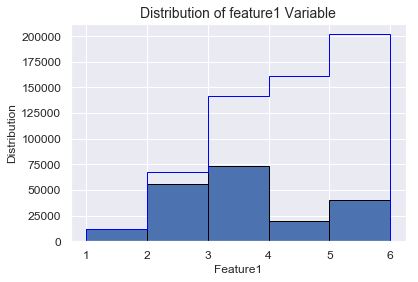

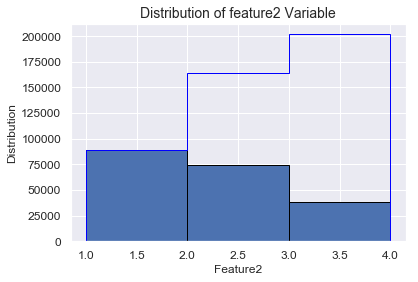

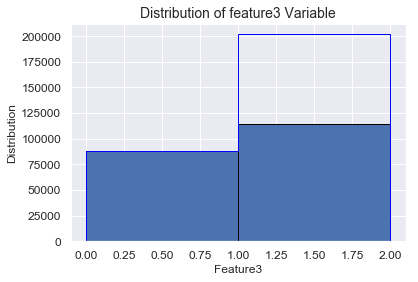

In [4]:
sns.set()
#ax1=plt.subplot(1,2,1)
plt.title('Distribution of feature1 Variable',fontsize=14)
plt.xlabel('Feature1',fontsize=12)
plt.ylabel('Distribution',fontsize=12)
plt.hist(train['feature_1'],bins=[1,2,3,4,5,6],histtype='bar',ec='black')
plt.hist(train['feature_1'],bins=[1,2,3,4,5,6],histtype='step',cumulative=True, ec='blue')
#plt.legend(loc='upper right',fontsize=12)
plt.xticks(fontsize = 12) 
plt.yticks(fontsize = 12) 
plt.show()

plt.title('Distribution of feature2 Variable',fontsize=14)
plt.xlabel('Feature2',fontsize=12)
plt.ylabel('Distribution',fontsize=12)
plt.hist(train['feature_2'],bins=[1,2,3,4],histtype='bar',ec='black')
plt.hist(train['feature_2'],bins=[1,2,3,4],histtype='step',cumulative=True, ec='blue')
#plt.legend(loc='upper right',fontsize=12)
plt.xticks(fontsize = 12) 
plt.yticks(fontsize = 12) 
plt.show()

plt.title('Distribution of feature3 Variable',fontsize=14)
plt.xlabel('Feature3',fontsize=12)
plt.ylabel('Distribution',fontsize=12)
plt.hist(train['feature_3'],bins=[0,1,2],histtype='bar',ec='black')
plt.hist(train['feature_3'],bins=[0,1,2],histtype='step',cumulative=True, ec='blue')
#plt.legend(loc='upper right',fontsize=12)
plt.xticks(fontsize = 12) 
plt.yticks(fontsize = 12) 
plt.show()

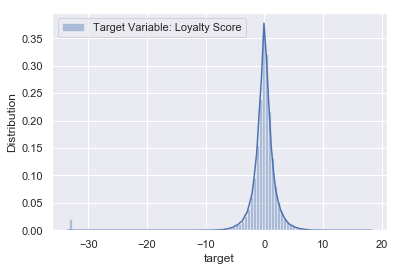

In [5]:
sns.distplot(train['target'], label="Target Variable: Loyalty Score", bins=100)
plt.xlabel('target',fontsize=12)
plt.ylabel('Distribution',fontsize=12)
plt.legend(loc=1,fontsize=12)
plt.legend()

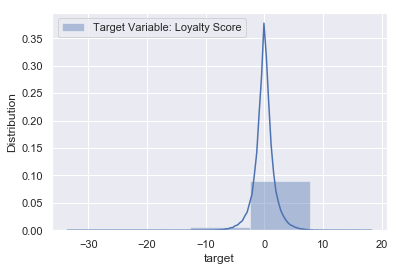

In [6]:
sns.distplot(train['target'], label="Target Variable: Loyalty Score", bins=5)
plt.xlabel('target',fontsize=12)
plt.ylabel('Distribution',fontsize=12)
plt.legend(loc=1,fontsize=12)
plt.legend()

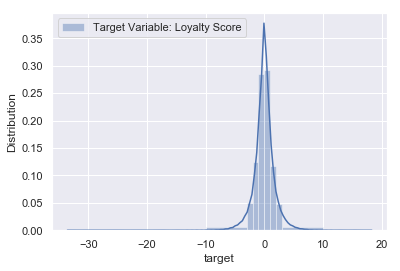

In [7]:
sns.distplot(train['target'], label="Target Variable: Loyalty Score", bins=[-10,-3,-2,-1,0,1,2,3,10])
plt.xlabel('target',fontsize=12)
plt.ylabel('Distribution',fontsize=12)
plt.legend(loc=1,fontsize=12)
plt.legend()

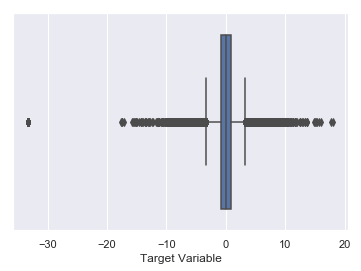

In [8]:
sns.boxplot(train['target'])
plt.xlabel('Target Variable')
plt.show()

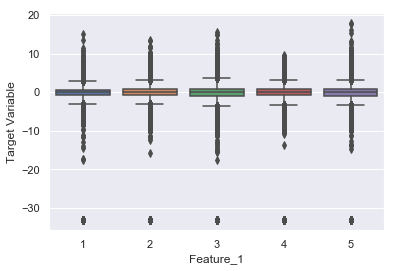

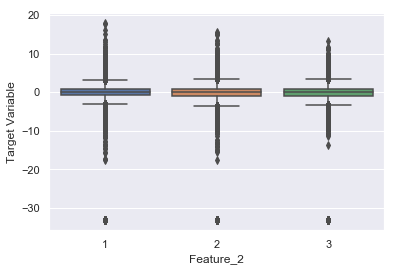

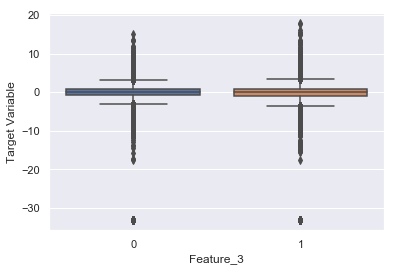

In [9]:
sns.boxplot(x='feature_1',y='target',data=train)
plt.xlabel('Feature_1',fontsize=12)
plt.ylabel('Target Variable')
plt.show()

sns.boxplot(x='feature_2',y='target',data=train)
plt.xlabel('Feature_2',fontsize=12)
plt.ylabel('Target Variable')
plt.show()

sns.boxplot(x='feature_3',y='target',data=train)
plt.xlabel('Feature_3',fontsize=12)
plt.ylabel('Target Variable')
plt.show()

## <b>Observations</b>

<b> Target Variable </b>
<li> The histogram of the target variable (e.g. the loyalty score) has a high tip with narrow width. So, a higher percentage
of the target variable is near its mean and the distribution drops rapidly as the target increases or decreases. We also
observed (from the histogram with 5 bins) that a higher fraction of people has a positive loyalty score compared with the
fraction of people who have a negative loyalty score. <br>
<li> The boxplot of the target variable demonstrates that the variable has many outliers. <br>
    
<b> Three Feature Variables (feature_1, feature_2 and feature_3) </b>
<li> feature1: The feature1 variable has a random distribution with most cardholders having a value 2 or 3. <br>
<li> feature2: The feature2 variable has an inverse relationship with frequency of cardholders. As the feature_2 value increases, the frequency of cardholders with the value decreases. <br>
<li> feature3: The feature3 variable is a boolean feature with 0/1 value. There is slightly higher number of cardholders with one  compared with the number of cardholders with zero.<br>
<li> Next, we plot the boxplots of target variable with feature_1, feature_2 and feature_3 variable. We could not find any noticeable influence of the variable elements on the target variable. <br>



In [10]:
# Check the member registration range in the dataset.
# Both Datasets Subscription Range: 2011-11-01 to 2018-02-01
display(train['first_active_month'].min())
display(train['first_active_month'].max())

Timestamp('2011-11-01 00:00:00')

Timestamp('2018-02-01 00:00:00')

<b>Determining the Model Run Date</b> <br>
From the data dictionary, we got the hint regarding the reference day on which the current model was run. 
Analyzing the fields month_lag and purchase_date in historical transactions dataset, it is evident that 
the reference date was in February 2018. For simplicity, lets consider the reference date to be Feb 1st, 2018. <br>

Next, we analyze the first_active_month field. We derive two features: (i) start_month and (ii) the day difference between first_active_month field and the reference date. <br>


In [11]:
import datetime

for df in [train]:
    df['first_active_month'] = pd.to_datetime(df['first_active_month'])
    df['start_year'] = df['first_active_month'].dt.year
    df['start_month'] = df['first_active_month'].dt.month
    df['elapsed_date'] = (datetime.date(2018, 2, 1) - df['first_active_month'].dt.date).dt.days

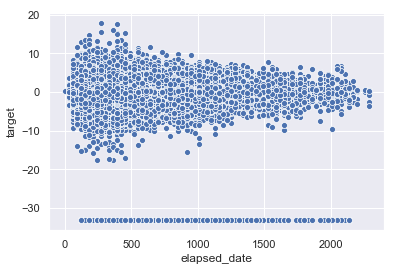

In [12]:
sns.scatterplot(x="elapsed_date", y="target", data=train)

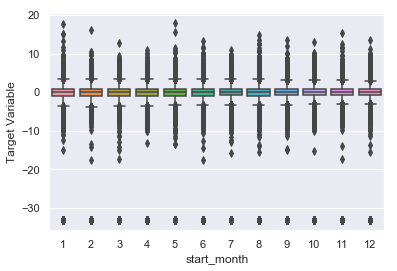

In [13]:
sns.boxplot(x='start_month',y='target',data=train)
plt.xlabel('start_month',fontsize=12)
plt.ylabel('Target Variable')
plt.show()

<b> Observations </b> <br>
<li> The plot of elapsed_date and target variable assumed a funnel shape  hinting that the target scores tend more towards 0 as elapsed date increases. <br>
<li> From the boxplot of start_month and target variable, we are unable to notice any significant influence of first_month on the target variable. <br>
<li> In all the analysis below, we see few card_ids with score below -30 and rest all scores are greater than -20. <b> We should treat these outliers </b>. For exploratory data analysis, we decide to remove the card_ids with a target score < -30 and proceed further in our analysis. <br>

In [15]:
# Outlier Dataset Analysis
train_outlier=train[train['target']<=-30]
display(len(train_outlier))
display(train_outlier.head())

2207

,first_active_month,card_id,feature_1,feature_2,feature_3,target,start_year,start_month,elapsed_date
64,2017-09-01,C_ID_8186f3fcc1,3,1,1,-33.219281,2017,9,153
92,2015-05-01,C_ID_b9379a30ea,3,3,1,-33.219281,2015,5,1007
125,2015-10-01,C_ID_e9120f535c,3,3,1,-33.219281,2015,10,854
151,2017-03-01,C_ID_65715cb80d,4,2,0,-33.219281,2017,3,337
225,2017-01-01,C_ID_ae77d244b6,2,1,0,-33.219281,2017,1,396


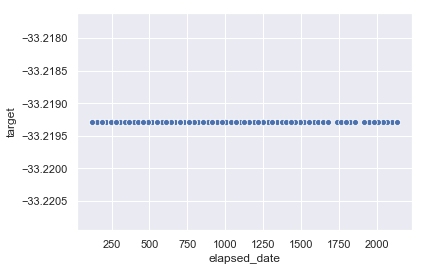

In [16]:
sns.scatterplot(x="elapsed_date", y="target", data=train_outlier)

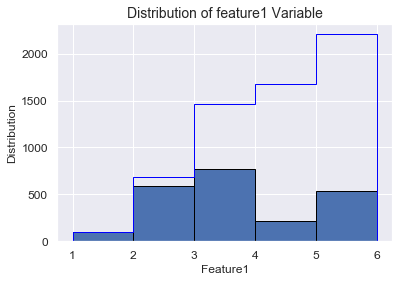

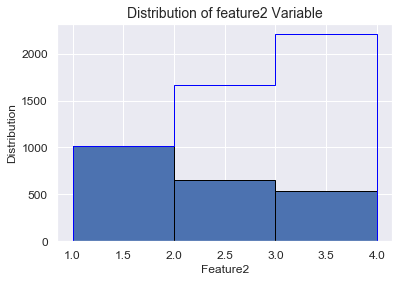

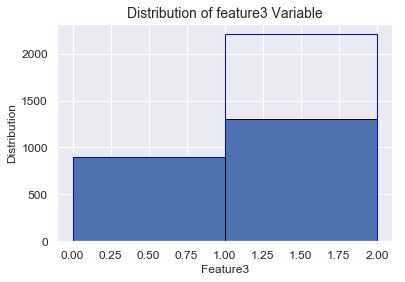

In [17]:
sns.set()
#ax1=plt.subplot(1,2,1)
plt.title('Distribution of feature1 Variable',fontsize=14)
plt.xlabel('Feature1',fontsize=12)
plt.ylabel('Distribution',fontsize=12)
plt.hist(train_outlier['feature_1'],bins=[1,2,3,4,5,6],histtype='bar',ec='black')
plt.hist(train_outlier['feature_1'],bins=[1,2,3,4,5,6],histtype='step',cumulative=True, ec='blue')
#plt.legend(loc='upper right',fontsize=12)
plt.xticks(fontsize = 12) 
plt.yticks(fontsize = 12) 
plt.show()

plt.title('Distribution of feature2 Variable',fontsize=14)
plt.xlabel('Feature2',fontsize=12)
plt.ylabel('Distribution',fontsize=12)
plt.hist(train_outlier['feature_2'],bins=[1,2,3,4],histtype='bar',ec='black')
plt.hist(train_outlier['feature_2'],bins=[1,2,3,4],histtype='step',cumulative=True, ec='blue')
#plt.legend(loc='upper right',fontsize=12)
plt.xticks(fontsize = 12) 
plt.yticks(fontsize = 12) 
plt.show()

plt.title('Distribution of feature3 Variable',fontsize=14)
plt.xlabel('Feature3',fontsize=12)
plt.ylabel('Distribution',fontsize=12)
plt.hist(train_outlier['feature_3'],bins=[0,1,2],histtype='bar',ec='black')
plt.hist(train_outlier['feature_3'],bins=[0,1,2],histtype='step',cumulative=True, ec='blue')
#plt.legend(loc='upper right',fontsize=12)
plt.xticks(fontsize = 12) 
plt.yticks(fontsize = 12) 
plt.show()

<b>Analysis on outlier dataset (target <=30)</b>
<li> It is evident that the distribution of feature_1, feature_2 and feature_3 variables are almost the same 
as that of entire training dataset. <br>
<li> The scatter plot between the target and the elapsed days reveals that elapsed date does not have influence
on the target variable.

In [19]:
# Next We import the historical transactions dataset and join with the trainiing outliers dataset to draw few insights
#Import historical transactions
historical_transactions=pd.read_csv(data_path+"historical_transactions.csv",parse_dates=['purchase_date'])
print(historical_transactions.shape)
display(historical_transactions.head(5)) #Preview historical_trasactions data
display(historical_transactions.info())
#display(historical_transactions.describe())

historical_transactions['category_1'] = historical_transactions['category_1'].map({'Y':1, 'N':0})
historical_transactions['category_3'] = historical_transactions['category_3'].map({'A':1, 'B': 2, 'C': 3})
historical_transactions['purchase_elapsed_days'] = (datetime.date(2018, 2, 1) - historical_transactions['purchase_date'].dt.date).dt.days





(29112361, 14)


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
authorized_flag         object
card_id                 object
city_id                 int64
category_1              object
installments            int64
category_3              object
merchant_category_id    int64
merchant_id             object
month_lag               int64
purchase_amount         float64
purchase_date           datetime64[ns]
category_2              float64
state_id                int64
subsector_id            int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)
memory usage: 3.0+ GB


None

KeyboardInterrupt: 

In [21]:
train_outlier_hist=pd.merge(left=train_outlier,right=historical_transactions,on='card_id')
train_outlier_hist.head(5)

,first_active_month,card_id,feature_1,feature_2,feature_3,target,start_year,start_month,elapsed_date,authorized_flag,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,2017-09-01,C_ID_8186f3fcc1,3,1,1,-33.219281,2017,9,153,Y,149,0,1,2.0,705,M_ID_f15a843a23,-1,-0.618055,2018-01-06 11:57:23,5.0,20,33
1,2017-09-01,C_ID_8186f3fcc1,3,1,1,-33.219281,2017,9,153,Y,-1,1,2,3.0,683,M_ID_7de9fe0811,-4,-0.431381,2017-10-08 02:54:59,NaN,-1,34
2,2017-09-01,C_ID_8186f3fcc1,3,1,1,-33.219281,2017,9,153,Y,304,0,1,2.0,690,M_ID_fbd2a9a388,-5,-0.611714,2017-09-30 21:07:14,5.0,20,1
3,2017-09-01,C_ID_8186f3fcc1,3,1,1,-33.219281,2017,9,153,Y,149,0,1,2.0,705,M_ID_96fad20d15,-2,-0.405535,2017-12-26 16:50:51,5.0,20,33
4,2017-09-01,C_ID_8186f3fcc1,3,1,1,-33.219281,2017,9,153,Y,149,0,1,2.0,842,M_ID_7e872c40f6,-1,-0.623690,2018-01-13 21:31:40,5.0,20,37


In [25]:
df_outlier=train_outlier_hist.groupby(['city_id']).agg({'purchase_amount':['sum','count']})
df_outlier.columns=['purchase_amount_sum','purchase_amount_count']
df_outlier.reset_index(level=0, inplace=True)
df_outlier.head(-1)

,city_id,purchase_amount_sum,purchase_amount_count
0,-1,-19548.379895,35544
1,1,-364.158437,658
2,2,-32.398542,72
3,3,-150.587196,248
4,4,-786.653220,1363
5,6,-19.417499,35
6,7,-93.675184,144
7,8,-396.526896,703
8,9,-172.044950,265
9,10,-11.437099,33


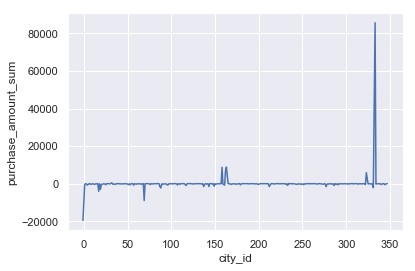

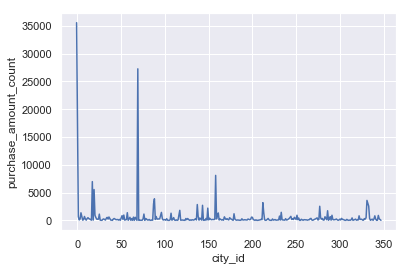

In [26]:
sns.lineplot(x='city_id',y='purchase_amount_sum',data=df_outlier)
plt.show()
sns.lineplot(x='city_id',y='purchase_amount_count',data=df_outlier)
plt.show()

<b> Analysis </b> <br>
<li> For the outliers transactions dataset, we find that most purchase amounts in city 333. <br>
<li> The number of cards in outliers category were 1% of total cards whereas (i) the purchase amount sum was 2% of total 
purchase amounts and (ii) the number of transactions were 7% of total transactions. <br>


In [29]:
train_outlier_hist['purchase_elapsed_days'] = (datetime.date(2018, 2, 1) - train_outlier_hist['purchase_date'].dt.date).dt.days

In [31]:
# Now we build the aggregated dataset from training dataset, historical transactions and new merchant transactions.
agg_func={
    'city_id':['max','count','nunique'],
    'state_id':['max','nunique'],
    'merchant_id':['nunique'],
    'purchase_amount':['sum','median','count'],
    'purchase_elapsed_days':[np.ptp,'sum','median'],
    'merchant_category_id':['nunique'],
    'installments':['median','max','min']
          }

agg_train_outlier_hist=train_outlier_hist.groupby(['card_id']).agg(agg_func)
agg_train_outlier_hist.columns=['hist_' + '_'.join(col).strip() for col in agg_train_outlier_hist.columns.values]
agg_train_outlier_hist.reset_index(inplace=True)
agg_train_outlier_hist.head()

,card_id,hist_city_id_max,hist_city_id_count,hist_city_id_nunique,hist_state_id_max,hist_state_id_nunique,hist_merchant_id_nunique,hist_purchase_amount_sum,hist_purchase_amount_median,hist_purchase_amount_count,hist_purchase_elapsed_days_ptp,hist_purchase_elapsed_days_sum,hist_purchase_elapsed_days_median,hist_merchant_category_id_nunique,hist_installments_median,hist_installments_max,hist_installments_min
0,C_ID_001982552a,288,79,7,20,5,42,-52.896627,-0.702580,79,264,13953,150.0,21,1.0,2,1
1,C_ID_0029d52418,283,378,4,9,2,23,-271.406317,-0.731806,378,394,60406,141.5,16,1.0,12,1
2,C_ID_0046b2b355,90,24,2,15,2,14,-15.376028,-0.708695,24,232,5946,244.0,10,0.0,0,0
3,C_ID_0050fc55c0,286,17,3,9,3,10,-10.844138,-0.677530,17,202,3684,226.0,9,1.0,2,1
4,C_ID_005799985c,242,11,2,9,1,5,-6.896267,-0.640670,11,311,2408,205.0,5,0.0,0,0


In [33]:
agg_train_outlier_hist_final=pd.merge(train_outlier,agg_train_outlier_hist, on='card_id', how='left')

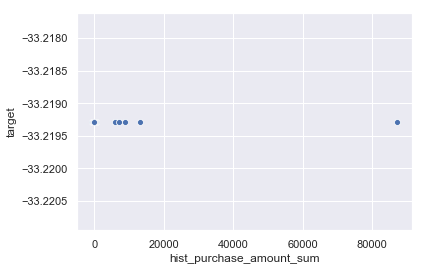

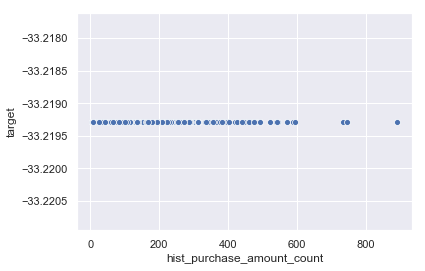

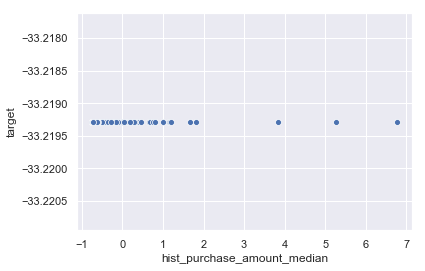

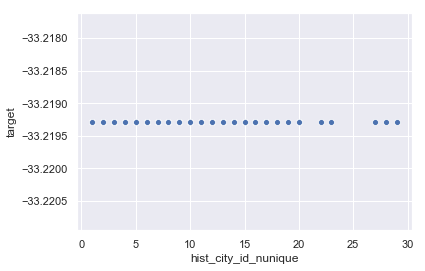

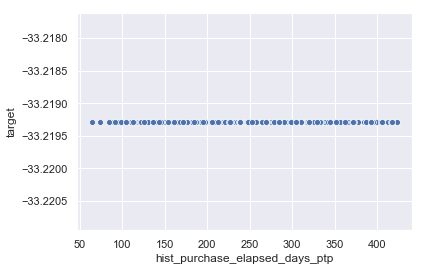

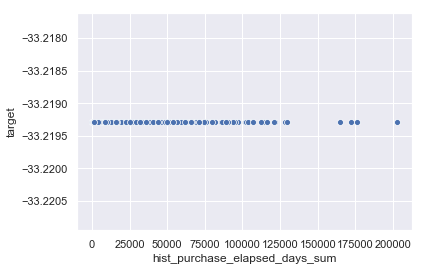

In [35]:
sns.scatterplot(x="hist_purchase_amount_sum", y="target", data=agg_train_outlier_hist_final)
plt.show()
sns.scatterplot(x="hist_purchase_amount_count", y="target", data=agg_train_outlier_hist_final)
plt.show()
sns.scatterplot(x="hist_purchase_amount_median", y="target", data=agg_train_outlier_hist_final)
plt.show()
sns.scatterplot(x="hist_city_id_nunique", y="target", data=agg_train_outlier_hist_final)
plt.show()
sns.scatterplot(x="hist_purchase_elapsed_days_ptp", y="target", data=agg_train_outlier_hist_final)
plt.show()
sns.scatterplot(x="hist_purchase_elapsed_days_sum", y="target", data=agg_train_outlier_hist_final)
plt.show()

<b>Observations</b>
<li> From the above charts, we can see that target score < -30 is associated with aggregated historical purchase amount < 18000 or aggregated historical purchase amount > 90000.<br>


In [36]:
# End of Outliers Dataset Analysis

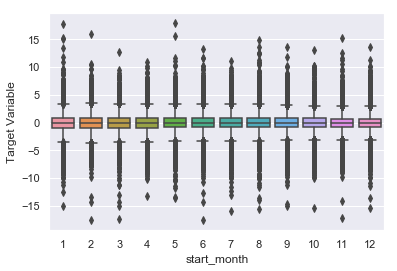

In [14]:
# Next we decide to remove the outliers and check few card_ids for further exploration.

train=train[train['target']>=-30]

#Then, we again check the start_month variable's influence on target variable

sns.boxplot(x='start_month',y='target',data=train)
plt.xlabel('start_month',fontsize=12)
plt.ylabel('Target Variable')
plt.show()


<b> Get two cardIds with high and low target value and analyze features  </b> <br>
We extract two datasets from the training dataset: (1) top 10% and (2) bottom 10% observations based on target variable. 
   We will join the datasets to historical transactions and new merchant transactions datasets and take one example 
from each dataset to analyze how the card_ids with high target score might be different from the card_ids with low 
target score. Next, we will analyze the difference between the two datasets at summary level to find any interesting 
observations we should validate while modeling. <br>

Here are the two card-IDs selected for analysis. We chose both the cardIDs with same first active month to eliminate any bias that may result from  tenure of membership. <br>

<table style="width:100%">
  <tr>
    <th>Card ID</th>
    <th>Target</th> 
    <th>Dataset</th>
  </tr>
  <tr>
    <td>C_ID_643ddaea8c</td>
    <td>3.459307</td> 
    <td>Target Score</td>
  </tr>
  <tr>
    <td>C_ID_24b7e16c4f</td>
    <td>-2.788379</td> 
    <td>Bottom 10% Target Score</td>
  </tr>
</table>


In [15]:
# Next, we find out the top 10 and bottom 10 percentile from the dataset and choose a random cardID from each category 
# and compare how various features on the dataset differ. 
print('10th Percentile of Target:',np.percentile(train['target'],10))
print('90th Percentile of Target:',np.percentile(train['target'],90))
train_top_10=train[train['target'] > np.percentile(train['target'],90)]
train_bottom_10=train[train['target'] < np.percentile(train['target'],10)]
print(len(train_top_10))
print(len(train_bottom_10))
print(len(train))
display(train_top_10.head())
display(train_bottom_10.head())

# Find the sample datasets and combine them to single dataset
sample_train_top_10=train_top_10[train_top_10['card_id']=='C_ID_643ddaea8c']
sample_train_bottom_10=train_bottom_10[train_bottom_10['card_id']=='C_ID_24b7e16c4f']
display(sample_train_top_10)
display(sample_train_bottom_10)

sample_train=pd.concat([sample_train_top_10,sample_train_bottom_10],ignore_index=True)
sample_train


10th Percentile of Target: -1.907988021
90th Percentile of Target: 1.843085424
19971
19971
199710


,first_active_month,card_id,feature_1,feature_2,feature_3,target,start_year,start_month,elapsed_date
7,2017-09-01,C_ID_dfa21fc124,3,2,1,2.135850,2017,9,153
21,2016-06-01,C_ID_25b2509282,1,2,0,4.747602,2016,6,610
49,2017-02-01,C_ID_f2e927e5da,2,2,0,3.659081,2017,2,365
90,2017-01-01,C_ID_643ddaea8c,3,2,1,3.459307,2017,1,396
107,2017-01-01,C_ID_03ef764f46,5,1,1,1.857981,2017,1,396


,first_active_month,card_id,feature_1,feature_2,feature_3,target,start_year,start_month,elapsed_date
11,2016-03-01,C_ID_269d816788,2,2,0,-2.433761,2016,3,702
30,2017-09-01,C_ID_8fa2ad405d,3,1,1,-3.737835,2017,9,153
31,2017-07-01,C_ID_ee82cdf108,5,2,1,-4.730778,2017,7,215
76,2017-09-01,C_ID_21c68ed023,2,3,0,-4.302144,2017,9,153
96,2017-01-01,C_ID_24b7e16c4f,3,3,1,-2.788379,2017,1,396


,first_active_month,card_id,feature_1,feature_2,feature_3,target,start_year,start_month,elapsed_date
90,2017-01-01,C_ID_643ddaea8c,3,2,1,3.459307,2017,1,396


,first_active_month,card_id,feature_1,feature_2,feature_3,target,start_year,start_month,elapsed_date
96,2017-01-01,C_ID_24b7e16c4f,3,3,1,-2.788379,2017,1,396


,first_active_month,card_id,feature_1,feature_2,feature_3,target,start_year,start_month,elapsed_date
0,2017-01-01,C_ID_643ddaea8c,3,2,1,3.459307,2017,1,396
1,2017-01-01,C_ID_24b7e16c4f,3,3,1,-2.788379,2017,1,396


In [16]:
#Import historical transactions
historical_transactions=pd.read_csv(data_path+"historical_transactions.csv",parse_dates=['purchase_date'])
print(historical_transactions.shape)
display(historical_transactions.head(5)) #Preview historical_trasactions data
display(historical_transactions.info())
#display(historical_transactions.describe())

sample_train_hist=pd.merge(left=sample_train,right=historical_transactions,on='card_id')
del historical_transactions

(29112361, 14)


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
authorized_flag         object
card_id                 object
city_id                 int64
category_1              object
installments            int64
category_3              object
merchant_category_id    int64
merchant_id             object
month_lag               int64
purchase_amount         float64
purchase_date           datetime64[ns]
category_2              float64
state_id                int64
subsector_id            int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)
memory usage: 3.0+ GB


None

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.645950e+07,2.911236e+07,2.911236e+07
mean,1.293256e+02,6.484954e-01,4.810130e+02,-4.487294e+00,3.640090e-02,2.194578e+00,1.056679e+01,2.684839e+01
std,1.042563e+02,2.795577e+00,2.493757e+02,3.588800e+00,1.123522e+03,1.531896e+00,6.366927e+00,9.692793e+00
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.300000e+01,-7.469078e-01,1.000000e+00,-1.000000e+00,-1.000000e+00
25%,5.300000e+01,0.000000e+00,3.070000e+02,-7.000000e+00,-7.203559e-01,1.000000e+00,9.000000e+00,1.900000e+01
50%,9.000000e+01,0.000000e+00,4.540000e+02,-4.000000e+00,-6.883495e-01,1.000000e+00,9.000000e+00,2.900000e+01
75%,2.120000e+02,1.000000e+00,7.050000e+02,-2.000000e+00,-6.032543e-01,3.000000e+00,1.600000e+01,3.400000e+01
max,3.470000e+02,9.990000e+02,8.910000e+02,0.000000e+00,6.010604e+06,5.000000e+00,2.400000e+01,4.100000e+01


In [20]:
#Import merchants dataset
merchants=pd.read_csv(data_path+"merchants.csv")
print(merchants.shape)
display(merchants.head(5)) #Preview historical_trasactions data
display(merchants.info())
display(merchants.describe())



(334696, 22)


,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,9.666667,3,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,1.750000,3,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,260.000000,2,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,1.666667,3,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,0.500000,3,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334696 entries, 0 to 334695
Data columns (total 22 columns):
merchant_id                    334696 non-null object
merchant_group_id              334696 non-null int64
merchant_category_id           334696 non-null int64
subsector_id                   334696 non-null int64
numerical_1                    334696 non-null float64
numerical_2                    334696 non-null float64
category_1                     334696 non-null object
most_recent_sales_range        334696 non-null object
most_recent_purchases_range    334696 non-null object
avg_sales_lag3                 334683 non-null float64
avg_purchases_lag3             334696 non-null float64
active_months_lag3             334696 non-null int64
avg_sales_lag6                 334683 non-null float64
avg_purchases_lag6             334696 non-null float64
active_months_lag6             334696 non-null int64
avg_sales_lag12                334683 non-null float64
avg_purchases_lag12    

None

,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,city_id,state_id,category_2
count,334696.000000,334696.000000,334696.000000,334696.000000,334696.000000,334683.000000,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,334696.000000,334696.000000,322809.000000
mean,31028.736143,423.131663,25.116404,0.011476,0.008103,13.832993,inf,2.994108,2.165079e+01,inf,5.947397,2.522771e+01,inf,11.599335,102.917926,11.860942,2.380002
std,31623.043426,252.898046,9.807371,1.098154,1.070497,2395.489999,NaN,0.095247,3.947108e+03,NaN,0.394936,5.251842e+03,NaN,1.520138,107.090673,6.176889,1.562661
min,1.000000,-1.000000,-1.000000,-0.057471,-0.057471,-82.130000,3.334953e-01,1.000000,-8.213000e+01,1.670447e-01,1.000000,-8.213000e+01,9.832954e-02,1.000000,-1.000000,-1.000000,1.000000
25%,3612.000000,222.000000,19.000000,-0.057471,-0.057471,0.880000,9.236499e-01,3.000000,8.500000e-01,9.022475e-01,6.000000,8.500000e-01,8.983333e-01,12.000000,-1.000000,9.000000,1.000000
50%,19900.000000,373.000000,27.000000,-0.057471,-0.057471,1.000000,1.016667e+00,3.000000,1.010000e+00,1.026961e+00,6.000000,1.020000e+00,1.043361e+00,12.000000,69.000000,9.000000,2.000000
75%,51707.250000,683.000000,33.000000,-0.047556,-0.047556,1.160000,1.146522e+00,3.000000,1.230000e+00,1.215575e+00,6.000000,1.290000e+00,1.266480e+00,12.000000,182.000000,16.000000,4.000000
max,112586.000000,891.000000,41.000000,183.735111,182.079322,851844.640000,inf,3.000000,1.513959e+06,inf,6.000000,2.567408e+06,inf,12.000000,347.000000,24.000000,5.000000


In [21]:
sample_train_hist_merchant=pd.merge(left=sample_train_hist,right=merchants,on='merchant_id')
display(sample_train_hist_merchant.head())
del merchants

,first_active_month,card_id,feature_1,feature_2,feature_3,target,start_year,start_month,elapsed_date,authorized_flag,city_id_x,category_1_x,installments,category_3,merchant_category_id_x,merchant_id,month_lag,purchase_amount,purchase_date,category_2_x,state_id_x,subsector_id_x,merchant_group_id,merchant_category_id_y,subsector_id_y,numerical_1,numerical_2,category_1_y,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id_y,state_id_y,category_2_y
0,2017-01-01,C_ID_643ddaea8c,3,2,1,3.459307,2017,1,396,Y,69,N,0,A,80,M_ID_c03b62d83d,-1,-0.723617,2017-12-28 15:04:55,1.0,9,37,3290,80,37,1.588403,0.011934,N,A,A,1.02,1.047975,3,1.02,1.072008,6,1.06,1.102324,12,Y,69,9,1.0
1,2017-01-01,C_ID_643ddaea8c,3,2,1,3.459307,2017,1,396,Y,69,N,0,A,80,M_ID_c03b62d83d,-10,-0.733534,2017-03-10 18:01:13,1.0,9,37,3290,80,37,1.588403,0.011934,N,A,A,1.02,1.047975,3,1.02,1.072008,6,1.06,1.102324,12,Y,69,9,1.0
2,2017-01-01,C_ID_643ddaea8c,3,2,1,3.459307,2017,1,396,Y,69,N,0,A,80,M_ID_c03b62d83d,-12,-0.669822,2017-01-28 22:25:30,1.0,9,37,3290,80,37,1.588403,0.011934,N,A,A,1.02,1.047975,3,1.02,1.072008,6,1.06,1.102324,12,Y,69,9,1.0
3,2017-01-01,C_ID_643ddaea8c,3,2,1,3.459307,2017,1,396,Y,69,N,0,A,80,M_ID_c03b62d83d,0,-0.732633,2018-01-11 17:46:18,1.0,9,37,3290,80,37,1.588403,0.011934,N,A,A,1.02,1.047975,3,1.02,1.072008,6,1.06,1.102324,12,Y,69,9,1.0
4,2017-01-01,C_ID_643ddaea8c,3,2,1,3.459307,2017,1,396,Y,69,N,0,A,80,M_ID_c03b62d83d,-4,-0.743151,2017-09-20 17:08:08,1.0,9,37,3290,80,37,1.588403,0.011934,N,A,A,1.02,1.047975,3,1.02,1.072008,6,1.06,1.102324,12,Y,69,9,1.0


In [22]:
# Add the elpased_date column to historical_transactions dataset
sample_train_hist_merchant['purchase_elapsed_date'] \
    = (datetime.date(2018, 2, 1) - sample_train_hist_merchant['purchase_date'].dt.date).dt.days

In [23]:
agg_func={
    'city_id_x':['nunique'],
    'merchant_id':['nunique'],
    'purchase_amount':['sum','median'],
    'purchase_elapsed_date':[np.ptp,'sum','median'],
    'merchant_group_id':['nunique'],
    'merchant_category_id_x':['nunique'],
    'numerical_1':['sum'],
    'numerical_2':['sum']
          }

sample_agg_hist=sample_train_hist_merchant.groupby(['card_id']).agg(agg_func)
sample_agg_hist.columns=['hist_' + '_'.join(col).strip() for col in sample_agg_hist.columns.values]
sample_agg_hist.reset_index(inplace=True)

C:\Users\Mishraji\Miniconda3\envs\py3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [24]:
sample_agg_hist

,card_id,hist_city_id_x_nunique,hist_merchant_id_nunique,hist_purchase_amount_sum,hist_purchase_amount_median,hist_purchase_elapsed_date_ptp,hist_purchase_elapsed_date_sum,hist_purchase_elapsed_date_median,hist_merchant_group_id_nunique,hist_merchant_category_id_x_nunique,hist_numerical_1_sum,hist_numerical_2_sum
0,C_ID_24b7e16c4f,9,21,-24.441808,-0.615276,243,8637,141,15,13,43.510051,43.351412
1,C_ID_643ddaea8c,4,45,-75.413915,-0.714751,352,22279,248,34,20,2368.751888,2315.984767


<b> Observations from the summarized measures </b> <br>
The cardID with high target score was associated with following metrics <br>
<b>Higher </b>
<li>Count of Unique Merchant IDs
<li>Absolute value of historical purchase amount sum
<li>Historical elapsed time range
<li>Sum of Elapsed days
<li>Median of Elapsed Time
<li>Count of Unique Merchant Group IDs
<li>Count of Unique Historical Merchant Categories
<li>Sum of Numerical_1 quantity
<li>Sum of Numerical_2 quantity <br>
<b>Lower</b>
<li>Unique City IDs. <br>
    
Next, we analyze the 3 datasets merchants, historical_transactions and new_merchant_transactions.

In [28]:
# Exploratory Data Analysis on Merchants Dataset
#Import merchants dataset
merchants=pd.read_csv(data_path+"merchants.csv")
print(merchants.shape)
display(merchants.head(5)) #Preview historical_trasactions data
display(merchants.info())
#display(merchants.describe())

(334696, 22)


,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,9.666667,3,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,1.750000,3,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,260.000000,2,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,1.666667,3,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,0.500000,3,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334696 entries, 0 to 334695
Data columns (total 22 columns):
merchant_id                    334696 non-null object
merchant_group_id              334696 non-null int64
merchant_category_id           334696 non-null int64
subsector_id                   334696 non-null int64
numerical_1                    334696 non-null float64
numerical_2                    334696 non-null float64
category_1                     334696 non-null object
most_recent_sales_range        334696 non-null object
most_recent_purchases_range    334696 non-null object
avg_sales_lag3                 334683 non-null float64
avg_purchases_lag3             334696 non-null float64
active_months_lag3             334696 non-null int64
avg_sales_lag6                 334683 non-null float64
avg_purchases_lag6             334696 non-null float64
active_months_lag6             334696 non-null int64
avg_sales_lag12                334683 non-null float64
avg_purchases_lag12    

None

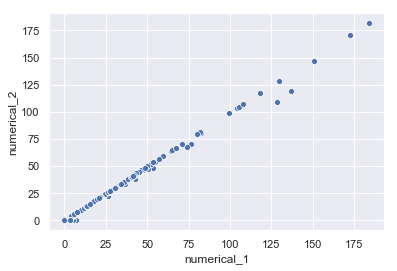

In [29]:
sns.scatterplot(x="numerical_1", y="numerical_2", data=merchants)

In [30]:
# Finding pearson coefficient between numerial_1 and numerical_2
r = np.corrcoef(merchants['numerical_1'],merchants['numerical_2'])[0,1]
print('The Pearson Correlation Coefficient is', r)

The Pearson Correlation Coefficient is 0.9987489701061474


In [31]:
del merchants['numerical_2']

In [32]:
#Chi Squared Test
temp_table=pd.crosstab(index=merchants.most_recent_sales_range, columns=merchants.most_recent_purchases_range)
chi2,pval,_,_=stats.chi2_contingency(temp_table)
print('Chi-Squared Test Statistics:',chi2)
print('p value:',pval)

Chi-Squared Test Statistics: 435305.49008596526
p value: 0.0


In [33]:
# Converting Categorical variables to numeric (1 to 5)
merchants['most_recent_sales_range'] \
        = merchants['most_recent_sales_range'].map({'A':1, 'B':2, 'C':3, 'D':4, 'E':5})
merchants['most_recent_purchases_range'] \
        = merchants['most_recent_purchases_range'].map({'A':1, 'B':2, 'C':3, 'D':4, 'E':5})

In [34]:
display(merchants.head())
display(merchants.most_recent_sales_range.value_counts())
display(merchants.most_recent_purchases_range.value_counts())

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,N,5,5,-0.40,9.666667,3,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,N,5,5,-0.72,1.750000,3,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,N,5,5,-82.13,260.000000,2,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,Y,5,5,NaN,1.666667,3,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,Y,5,5,NaN,0.500000,3,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


5    177104
4    117475
3     34075
2      5037
1      1005
Name: most_recent_sales_range, dtype: int64

5    175309
4    119187
3     34144
2      5046
1      1010
Name: most_recent_purchases_range, dtype: int64

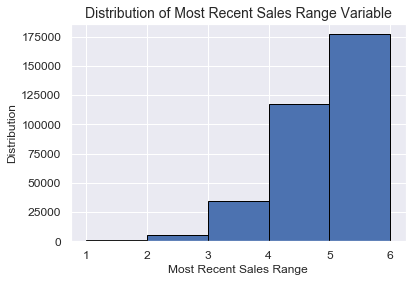

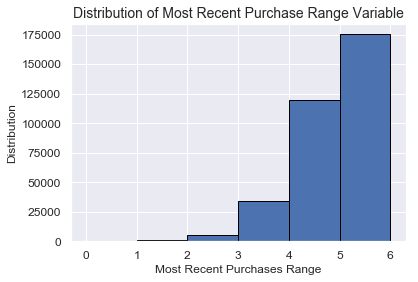

In [35]:
import matplotlib.pyplot as plt
sns.set()
plt.title('Distribution of Most Recent Sales Range Variable',fontsize=14)
plt.xlabel('Most Recent Sales Range',fontsize=12)
plt.ylabel('Distribution',fontsize=12)
plt.hist(merchants['most_recent_sales_range'],bins= [1,2,3,4,5,6], histtype='bar',ec='black')
#plt.hist(merchants['most_recent_purchases_range'],histtype='step',cumulative=True, ec='blue')
#plt.legend(loc='upper right',fontsize=12)
plt.xticks(fontsize = 12) 
plt.yticks(fontsize = 12) 
plt.show()

plt.title('Distribution of Most Recent Purchase Range Variable',fontsize=14)
plt.xlabel('Most Recent Purchases Range',fontsize=12)
plt.ylabel('Distribution',fontsize=12)
plt.hist(merchants['most_recent_purchases_range'],bins= [0,1,2,3,4,5,6], histtype='bar',ec='black')
#plt.hist(merchants['most_recent_purchases_range'],histtype='step',cumulative=True, ec='blue')
#plt.legend(loc='upper right',fontsize=12)
plt.xticks(fontsize = 12) 
plt.yticks(fontsize = 12) 
plt.show()

<b>Observation</b>
The two variables most recent sales range and the most recent purchases range have highest number of merchants in high category.

In [36]:
display(merchants.subsector_id.value_counts())
display(merchants.city_id.value_counts())
display(merchants.state_id.value_counts())
display(merchants.category_2.value_counts())
display(merchants.category_4.value_counts())

 27    51678
 37    35575
 33    30887
 34    26533
 21    24207
 29    21588
 19    20361
 16    16435
 18    14279
 20     9528
 7      7706
 2      7432
 32     6691
 1      6111
 9      5777
 38     5729
 10     5399
 36     4882
 25     4534
 12     4506
 30     4389
 15     3441
 41     3072
 31     2409
 4      2005
 8      1367
 22     1050
 23     1029
 13      941
 39      828
 5       796
 35      667
 40      656
 26      581
 14      523
 17      497
 3       342
 24      242
 11       21
 28        1
-1         1
Name: subsector_id, dtype: int64

-1      105184
 69      21658
 158      7957
 17       6518
 143      5368
 88       5230
 137      4785
 212      4324
 87       3717
 25       2983
 160      2652
 4        2592
 233      2592
 277      2231
 213      2186
 76       1965
 53       1897
 51       1887
 283      1743
 291      1698
 140      1673
 246      1661
 161      1639
 289      1637
 169      1621
 60       1510
 12       1506
 251      1506
 21       1502
 116      1484
 11       1413
 248      1392
 200      1335
 333      1332
 1        1305
 117      1304
 340      1302
 8        1232
 30       1224
 314      1212
 42       1178
 231      1136
 90       1126
 110      1123
 64       1114
 33       1088
 274      1053
 24       1034
 34       1008
 210       970
 14        947
 52        946
 126       915
 278       907
 188       889
 334       886
 279       860
 323       855
 3         838
 247       832
 232       827
 271       826
 171       813
 181       807
 296       779
 308       776
 300      

 9     92708
 16    33226
 15    27224
 5     23547
 19    18793
 20    15660
 4     14216
 21    13716
-1     11887
 13     9487
 7      9375
 24     8045
 12     7730
 11     7318
 22     6553
 14     6194
 2      5061
 23     4357
 18     3815
 3      3629
 10     3184
 1      2908
 8      2842
 17     1961
 6      1260
Name: state_id, dtype: int64

1.0    160888
5.0     52923
3.0     51887
4.0     36450
2.0     20661
Name: category_2, dtype: int64

N    238596
Y     96100
Name: category_4, dtype: int64

<b>Observation</b>
City_id is -1 for very high number of rows. This column should not be used for modeling.

In [37]:
# Converting the variables category_4 and category_1 from categorical to numeric
merchants['category_4'] = merchants['category_4'].map({'Y':1, 'N':0})
merchants['category_1'] = merchants['category_1'].map({'Y':1, 'N':0})
merchants.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,0,5,5,-0.40,9.666667,3,-2.25,18.666667,6,-2.32,13.916667,12,0,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,0,5,5,-0.72,1.750000,3,-0.74,1.291667,6,-0.57,1.687500,12,0,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,0,5,5,-82.13,260.000000,2,-82.13,260.000000,2,-82.13,260.000000,2,0,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,1,5,5,NaN,1.666667,3,NaN,4.666667,6,NaN,3.833333,12,1,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,1,5,5,NaN,0.500000,3,NaN,0.361111,6,NaN,0.347222,12,1,-1,-1,NaN


In [38]:
del merchants
gc.collect()

5077

<b>Observation </b> <br>
<li> There is a strong positive correlation between numerical_1 and numerical_2 columns as shown by the scatterplot 
and the pearson correlation coefficient. Hence, We can remove column numerical_2 without losing the variability in 
the dataset. <br>
<li> The two variables: most recent sales range and the most recent purchases range have highest number of 
    merchants in high category. <br>
<li> The city_id attribute has many values -1. This may represent missing cities. Hence, we should represent caution 
     while including it for modeling. <br>

In [40]:
#Import historical transactions
historical_transactions=pd.read_csv(data_path+"historical_transactions.csv",parse_dates=['purchase_date'])
print(historical_transactions.shape)
display(historical_transactions.head(5)) #Preview historical_trasactions data
display(historical_transactions.info())
#display(historical_transactions.describe())

(29112361, 14)


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
authorized_flag         object
card_id                 object
city_id                 int64
category_1              object
installments            int64
category_3              object
merchant_category_id    int64
merchant_id             object
month_lag               int64
purchase_amount         float64
purchase_date           datetime64[ns]
category_2              float64
state_id                int64
subsector_id            int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)
memory usage: 3.0+ GB


None

In [41]:
display(historical_transactions.subsector_id.value_counts(dropna=False))
display(historical_transactions.city_id.value_counts(dropna=False))
display(historical_transactions.state_id.value_counts(dropna=False))
display(historical_transactions.category_1.value_counts(dropna=False))
display(historical_transactions.category_2.value_counts(dropna=False))
display(historical_transactions.category_3.value_counts(dropna=False))

 33    5594146
 37    4531755
 19    3147440
 29    2813095
 34    2759431
 27    1658301
 16    1651384
 21     837612
 7      711977
 1      695263
 15     665634
 8      541510
 18     395679
 36     331696
 20     299301
 30     292335
 39     259206
 25     259053
 41     196118
 12     192067
 22     179252
 31     142945
 17     132915
 32     129516
 2      110596
 38      89005
 3       87853
 10      81954
 9       77760
 4       59102
 35      39269
 26      25140
 13      23388
 5       23171
 14      21825
 23      19724
 24      18134
 40      13424
-1        2252
 11       2009
 28        124
Name: subsector_id, dtype: int64

 69     4835441
-1      2478624
 19     1151077
 158    1113013
 17      971714
 331     714414
 143     668769
 88      659328
 137     603023
 333     561144
 87      444940
 212     406196
 57      382232
 149     359540
 25      356757
 233     355108
 117     322414
 160     317617
 213     248371
 277     247294
 286     231877
 76      216048
 4       212403
 107     210182
 53      209668
 20      207650
 291     199983
 140     190359
 344     177694
 161     168745
 51      164222
 283     163347
 322     153926
 21      149278
 246     139898
 179     138888
 200     137668
 231     137245
 244     133140
 138     132244
 169     132161
 289     131576
 116     128194
 340     124669
 60      118852
 251     118368
 248     117916
 96      110001
 1       108519
 274     106563
 302     106447
 199     101660
 314      99370
 12       96647
 11       92785
 8        89353
 30       83598
 110      83196
 279      79094
 90       77047
 24       74184
 42       72730
 334    

 9     10568881
-1      2652864
 16     2143420
 15     2079255
 5      1655124
 19     1204287
 20     1141197
 22      971714
 21      929594
 4       840820
 7       640712
 13      634006
 11      631127
 3       542220
 12      385643
 18      384876
 2       371728
 1       247753
 10      222463
 23      206011
 24      205952
 14      171513
 8       157829
 17      116139
 6         7233
Name: state_id, dtype: int64

N    27028332
Y     2084029
Name: category_1, dtype: int64

 1.0    15177199
 3.0     3911795
 5.0     3725915
NaN      2652864
 4.0     2618053
 2.0     1026535
Name: category_2, dtype: int64

A      15411747
B      11677522
C       1844933
NaN      178159
Name: category_3, dtype: int64

In [42]:
historical_transactions['category_1'] = historical_transactions['category_1'].map({'Y':1, 'N':0})
historical_transactions['category_3'] = historical_transactions['category_3'].map({'A':1, 'B': 2, 'C': 3})
historical_transactions['purchase_elapsed_days'] = (datetime.date(2018, 2, 1) - historical_transactions['purchase_date'].dt.date).dt.days


In [45]:
df=historical_transactions.groupby(['city_id']).agg({'purchase_amount':['sum','count']})
df.columns=['purchase_amount_sum','purchase_amount_count']
df.reset_index(level=0, inplace=True)
df.head()

,city_id,purchase_amount_sum,purchase_amount_count
0,-1,-890862.015324,2478624
1,1,6877.017092,108519
2,2,-8798.655021,17171
3,3,-5546.779656,42665
4,4,13480.692589,212403


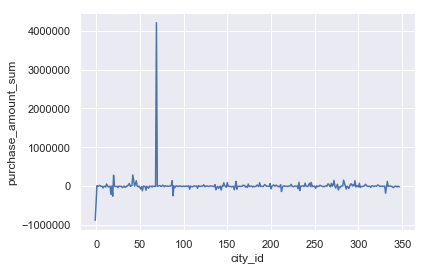

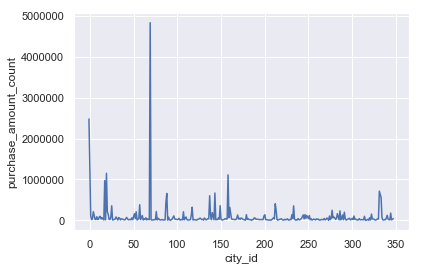

In [47]:
sns.lineplot(x='city_id',y='purchase_amount_sum',data=df)
plt.show()
sns.lineplot(x='city_id',y='purchase_amount_count',data=df)
plt.show()

<b>Observation</b> <br>
We aggregated the purchase amount field based on city_id and discovered few interesting insights. <br>
<li>The number of purchase transactions and the sum of purchase amount were the highest for City 69. In fact, the
total purchase amount of city 69 seems to be higher compared with all the cities combined. I believe city 69 may be
an important city in Brazil with high number of ELO card usage. <br>
<li>The purchase count associated with city -1 is very high, however the sum of purchase amount with city -1 is very low.
This means these may be small cities where low value transactions constitute a higher proportion from all transactions. <br>

<b> Building Aggegated Dataset and analyzing on it </b> <br>

Next, We build the aggregated datasets at card_id level through the following steps. <br>
<li> Aggregate the measures in historical transactions dataset. <br>
<li> Join the training dataset with the aggregated dataset based on card_id column. <br> 
<li> Delete the historical transactions dataset to free up memory. <br>
<li> Aggregate the measures in new merchant transactions datset.<br>
<li> Join the dataset in step 3 with the dataset in step 5 to get the final aggregated dataset for analysis. <br>

In [49]:
# Now we build the aggregated dataset from training dataset, historical transactions and new merchant transactions.
agg_func={
    'city_id':['max','count','nunique'],
    'state_id':['max','nunique'],
    'merchant_id':['nunique'],
    'purchase_amount':['sum','median','count'],
    'purchase_elapsed_days':[np.ptp,'sum','median'],
    'merchant_category_id':['nunique'],
    'installments':['median','max','min']
          }

agg_hist_trans=historical_transactions.groupby(['card_id']).agg(agg_func)
agg_hist_trans.columns=['hist_' + '_'.join(col).strip() for col in agg_hist_trans.columns.values]
agg_hist_trans.reset_index(inplace=True)
agg_hist_trans.head()

,card_id,hist_city_id_max,hist_city_id_count,hist_city_id_nunique,hist_state_id_max,hist_state_id_nunique,hist_merchant_id_nunique,hist_purchase_amount_sum,hist_purchase_amount_median,hist_purchase_amount_count,hist_purchase_elapsed_days_ptp,hist_purchase_elapsed_days_sum,hist_purchase_elapsed_days_median,hist_merchant_category_id_nunique,hist_installments_median,hist_installments_max,hist_installments_min
0,C_ID_00007093c1,333,149,4,21,3,29,-76.845041,-0.587627,149,378,24907,180.0,18,1.0,6,1
1,C_ID_0001238066,337,123,18,21,6,65,-72.447201,-0.648184,123,152,5013,40.0,29,1.0,10,-1
2,C_ID_0001506ef0,147,66,3,19,2,28,-34.601879,-0.703707,66,399,9048,82.0,19,0.0,1,0
3,C_ID_0001793786,322,216,10,24,4,119,-36.786013,-0.487911,216,283,45223,193.0,48,0.0,1,0
4,C_ID_000183fdda,344,144,9,18,7,73,-68.837938,-0.661294,144,202,8976,54.5,36,1.0,10,-1


In [50]:
del historical_transactions
gc.collect()

9036

In [51]:
train_agg_hist_trans=pd.merge(train,agg_hist_trans, on='card_id', how='left')
train_agg_hist_trans.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,start_year,start_month,elapsed_date,hist_city_id_max,hist_city_id_count,hist_city_id_nunique,hist_state_id_max,hist_state_id_nunique,hist_merchant_id_nunique,hist_purchase_amount_sum,hist_purchase_amount_median,hist_purchase_amount_count,hist_purchase_elapsed_days_ptp,hist_purchase_elapsed_days_sum,hist_purchase_elapsed_days_median,hist_merchant_category_id_nunique,hist_installments_median,hist_installments_max,hist_installments_min
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283,2017,6,245,334,260,7,20,3,94,-165.968739,-0.698042,260,243,27476,107.5,41,0.0,1,0
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913,2017,1,396,279,350,9,15,3,142,-210.006336,-0.708590,350,390,59170,182.5,57,1.0,10,-1
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056,2016,8,549,233,43,5,9,2,13,-29.167391,-0.698868,43,412,10522,285.0,8,0.0,0,0
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495,2017,9,153,212,77,7,22,5,50,-49.491364,-0.707989,77,155,5476,98.0,25,1.0,3,-1
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749,2017,11,92,143,133,6,22,6,66,-48.687656,-0.689807,133,108,3272,24.0,26,1.0,12,1


In [52]:
# Aggrgating the new merchant transactions dataset and joining to the combined dataset above.
#Import historical transactions
new_merchant_trans=pd.read_csv(data_path+"new_merchant_transactions.csv",parse_dates=['purchase_date'])
print(new_merchant_trans.shape)
display(new_merchant_trans.head(5)) #Preview historical_trasactions data
display(new_merchant_trans.info())
#display(historical_transactions.describe())

(1963031, 14)


,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963031 entries, 0 to 1963030
Data columns (total 14 columns):
authorized_flag         object
card_id                 object
city_id                 int64
category_1              object
installments            int64
category_3              object
merchant_category_id    int64
merchant_id             object
month_lag               int64
purchase_amount         float64
purchase_date           datetime64[ns]
category_2              float64
state_id                int64
subsector_id            int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)
memory usage: 209.7+ MB


None

In [53]:
display(new_merchant_trans.subsector_id.value_counts(dropna=False))
display(new_merchant_trans.city_id.value_counts(dropna=False))
display(new_merchant_trans.state_id.value_counts(dropna=False))
display(new_merchant_trans.category_1.value_counts(dropna=False))
display(new_merchant_trans.category_2.value_counts(dropna=False))
display(new_merchant_trans.category_3.value_counts(dropna=False))

 37    340053
 19    200528
 27    194977
 34    183700
 33    172585
 29    138039
 16    119297
 21     74176
 1      66913
 7      54145
 18     42079
 20     38433
 36     36621
 30     31443
 15     29772
 25     23805
 17     23233
 39     21487
 12     21351
 32     16673
 22     16460
 2      15851
 31     15000
 8      14979
 38     13057
 41     12848
 10      9849
 9       7590
 3       6237
 35      5233
 4       4302
 13      2419
 26      2221
 24      1907
 14      1488
 23      1423
 5       1316
 40       953
 11       560
-1         20
 28         8
Name: subsector_id, dtype: int64

 69     328916
-1       99349
 158     84962
 19      70961
 17      65300
 143     53997
 88      46301
 137     45007
 331     41429
 87      33967
 212     32143
 333     31354
 25      28315
 233     26682
 57      23514
 160     23132
 149     22288
 291     22112
 213     21042
 117     20500
 140     17831
 4       16672
 277     16624
 286     16030
 107     15629
 76      14424
 53      14319
 161     13679
 231     13140
 20      13117
 283     12297
 51      11294
 244     11237
 246     10589
 179     10219
 322      9956
 289      9896
 344      9836
 21       9441
 248      9435
 340      9082
 169      9049
 251      8962
 138      8864
 60       8123
 314      8009
 200      8008
 96       7915
 302      7599
 12       7423
 1        7415
 116      7218
 90       6825
 8        6590
 11       6583
 274      6423
 42       6315
 30       6092
 110      5858
 288      5826
 64       5688
 199      5684
 279      5626
 24       5444
 33       5200
 159      4966
 14       

 9     733146
 15    158304
 16    139765
 5     120158
-1     111745
 19     87980
 20     78953
 22     65300
 4      63532
 21     60155
 7      49342
 11     46905
 13     39432
 3      38908
 2      27814
 12     27027
 18     22139
 1      17908
 10     17273
 23     13069
 24     12825
 8      12218
 14     10326
 17      8450
 6        357
Name: state_id, dtype: int64

N    1899935
Y      63096
Name: category_1, dtype: int64

 1.0    1058242
 3.0     289525
 5.0     259266
 4.0     178590
NaN      111745
 2.0      65663
Name: category_2, dtype: int64

A      922244
B      836178
C      148687
NaN     55922
Name: category_3, dtype: int64

In [54]:
new_merchant_trans['category_1'] = new_merchant_trans['category_1'].map({'Y':1, 'N':0})
new_merchant_trans['category_3'] = new_merchant_trans['category_3'].map({'A':1, 'B': 2, 'C': 3})
new_merchant_trans['purchase_elapsed_days'] = (datetime.date(2018, 2, 1) - new_merchant_trans['purchase_date'].dt.date).dt.days


In [55]:
# Now we build the aggregated dataset from training dataset, historical transactions and new merchant transactions.
agg_func={
    'city_id':['max','count','nunique'],
    'state_id':['max','nunique'],
    'merchant_id':['nunique'],
    'purchase_amount':['sum','median','count'],
    'purchase_elapsed_days':[np.ptp,'sum','median'],
    'merchant_category_id':['nunique'],
    'installments':['median','max','min']
          }

agg_new_merchant_trans=new_merchant_trans.groupby(['card_id']).agg(agg_func)
agg_new_merchant_trans.columns=['new_mer_' + '_'.join(col).strip() for col in agg_new_merchant_trans.columns.values]
agg_new_merchant_trans.reset_index(inplace=True)
agg_new_merchant_trans.head()

,card_id,new_mer_city_id_max,new_mer_city_id_count,new_mer_city_id_nunique,new_mer_state_id_max,new_mer_state_id_nunique,new_mer_merchant_id_nunique,new_mer_purchase_amount_sum,new_mer_purchase_amount_median,new_mer_purchase_amount_count,new_mer_purchase_elapsed_days_ptp,new_mer_purchase_elapsed_days_sum,new_mer_purchase_elapsed_days_median,new_mer_merchant_category_id_nunique,new_mer_installments_median,new_mer_installments_max,new_mer_installments_min
0,C_ID_00007093c1,76,2,2,9,2,2,-1.328524,-0.664262,2,6,-128,-64.0,2,1.0,1,1
1,C_ID_0001238066,333,26,8,20,4,25,-14.850055,-0.649235,26,60,-1455,-51.0,15,1.0,10,-1
2,C_ID_0001506ef0,137,2,1,19,1,1,-1.447354,-0.723677,2,6,-92,-46.0,2,0.0,0,0
3,C_ID_0001793786,322,31,7,24,5,31,-0.229620,-0.372748,31,46,1851,66.0,21,0.0,0,0
4,C_ID_000183fdda,161,11,2,7,2,11,-6.590778,-0.665765,11,59,-519,-37.0,9,1.0,4,-1


In [56]:
train_agg_hist_new_mer_trans=pd.merge(train_agg_hist_trans,agg_new_merchant_trans, on='card_id', how='left')
train_agg_hist_new_mer_trans.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target,start_year,start_month,elapsed_date,hist_city_id_max,hist_city_id_count,hist_city_id_nunique,hist_state_id_max,hist_state_id_nunique,hist_merchant_id_nunique,hist_purchase_amount_sum,hist_purchase_amount_median,hist_purchase_amount_count,hist_purchase_elapsed_days_ptp,hist_purchase_elapsed_days_sum,hist_purchase_elapsed_days_median,hist_merchant_category_id_nunique,hist_installments_median,hist_installments_max,hist_installments_min,new_mer_city_id_max,new_mer_city_id_count,new_mer_city_id_nunique,new_mer_state_id_max,new_mer_state_id_nunique,new_mer_merchant_id_nunique,new_mer_purchase_amount_sum,new_mer_purchase_amount_median,new_mer_purchase_amount_count,new_mer_purchase_elapsed_days_ptp,new_mer_purchase_elapsed_days_sum,new_mer_purchase_elapsed_days_median,new_mer_merchant_category_id_nunique,new_mer_installments_median,new_mer_installments_max,new_mer_installments_min
0,2017-06-01,C_ID_92a2005557,5,2,1,-0.820283,2017,6,245,334,260,7,20,3,94,-165.968739,-0.698042,260,243,27476,107.5,41,0.0,1,0,276.0,23.0,3.0,9.0,1.0,23.0,-13.244202,-0.581180,23.0,55.0,-1340.0,-58.0,14.0,0.0,0.0,0.0
1,2017-01-01,C_ID_3d0044924f,4,1,0,0.392913,2017,1,396,279,350,9,15,3,142,-210.006336,-0.708590,350,390,59170,182.5,57,1.0,10,-1,69.0,6.0,1.0,9.0,1.0,6.0,-4.355735,-0.732633,6.0,57.0,-159.0,-25.5,5.0,1.0,1.0,1.0
2,2016-08-01,C_ID_d639edf6cd,2,2,0,0.688056,2016,8,549,233,43,5,9,2,13,-29.167391,-0.698868,43,412,10522,285.0,8,0.0,0,0,143.0,1.0,1.0,5.0,1.0,1.0,-0.700326,-0.700326,1.0,0.0,-86.0,-86.0,1.0,0.0,0.0,0.0
3,2017-09-01,C_ID_186d6a6901,4,3,0,0.142495,2017,9,153,212,77,7,22,5,50,-49.491364,-0.707989,77,155,5476,98.0,25,1.0,3,-1,17.0,7.0,2.0,22.0,2.0,7.0,-4.654372,-0.691610,7.0,42.0,-436.0,-66.0,6.0,1.0,1.0,-1.0
4,2017-11-01,C_ID_cdbd2c0db2,1,3,0,-0.159749,2017,11,92,143,133,6,22,6,66,-48.687656,-0.689807,133,108,3272,24.0,26,1.0,12,1,302.0,36.0,5.0,22.0,5.0,36.0,-19.926237,-0.607447,36.0,57.0,-2117.0,-59.5,17.0,1.0,2.0,-1.0


In [58]:
del agg_new_merchant_trans
gc.collect()

41

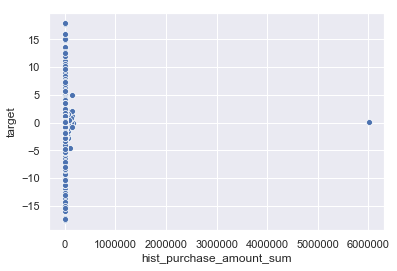

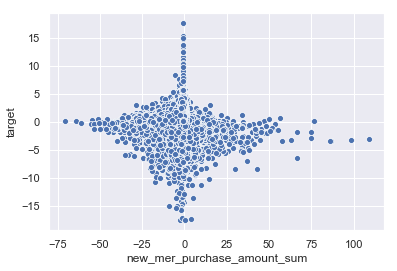

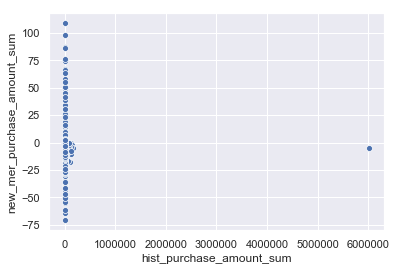

In [59]:
sns.scatterplot(x="hist_purchase_amount_sum", y="target", data=train_agg_hist_new_mer_trans)
plt.show()
sns.scatterplot(x="new_mer_purchase_amount_sum", y="target", data=train_agg_hist_new_mer_trans)
plt.show()
sns.scatterplot(x="hist_purchase_amount_sum", y="new_mer_purchase_amount_sum", data=train_agg_hist_new_mer_trans)
plt.show()

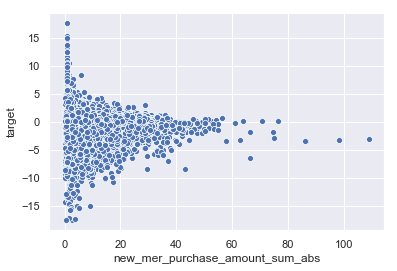

In [60]:
train_agg_hist_new_mer_trans['new_mer_purchase_amount_sum_abs']=np.abs(train_agg_hist_new_mer_trans['new_mer_purchase_amount_sum'])
sns.scatterplot(x="new_mer_purchase_amount_sum_abs", y="target", data=train_agg_hist_new_mer_trans)
plt.show()

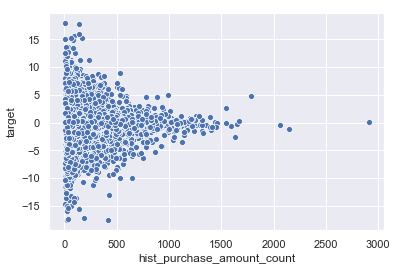

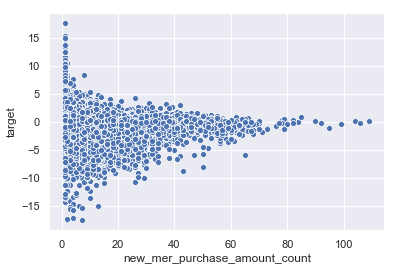

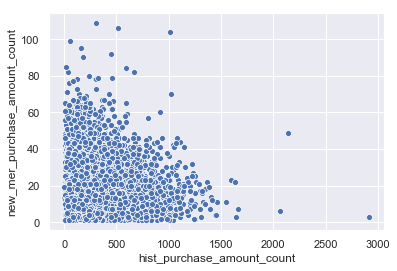

In [61]:
sns.scatterplot(x="hist_purchase_amount_count", y="target", data=train_agg_hist_new_mer_trans)
plt.show()
sns.scatterplot(x="new_mer_purchase_amount_count", y="target", data=train_agg_hist_new_mer_trans)
plt.show()
sns.scatterplot(x="hist_purchase_amount_count", y="new_mer_purchase_amount_count", data=train_agg_hist_new_mer_trans)
plt.show()

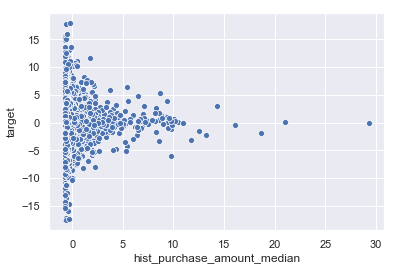

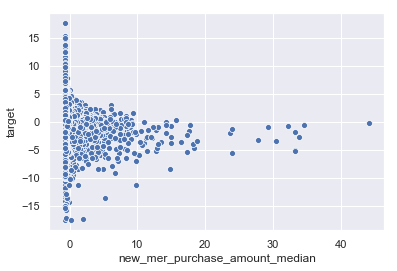

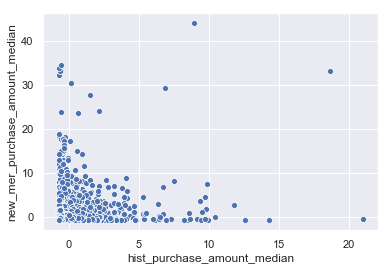

In [62]:
sns.scatterplot(x="hist_purchase_amount_median", y="target", data=train_agg_hist_new_mer_trans)
plt.show()
sns.scatterplot(x="new_mer_purchase_amount_median", y="target", data=train_agg_hist_new_mer_trans)
plt.show()
sns.scatterplot(x="hist_purchase_amount_median", y="new_mer_purchase_amount_median", data=train_agg_hist_new_mer_trans)
plt.show()

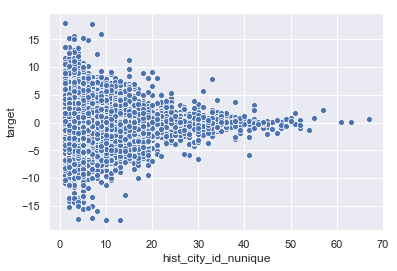

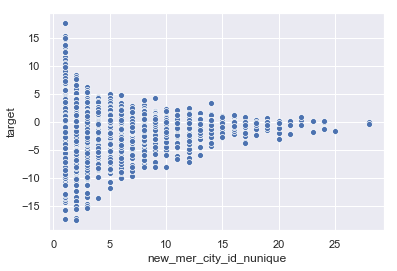

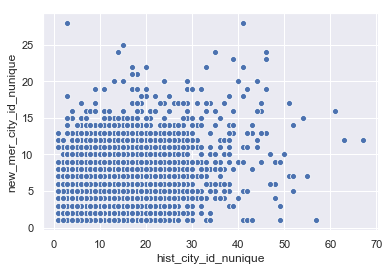

In [63]:
sns.scatterplot(x="hist_city_id_nunique", y="target", data=train_agg_hist_new_mer_trans)
plt.show()
sns.scatterplot(x="new_mer_city_id_nunique", y="target", data=train_agg_hist_new_mer_trans)
plt.show()
sns.scatterplot(x="hist_city_id_nunique", y="new_mer_city_id_nunique", data=train_agg_hist_new_mer_trans)
plt.show()

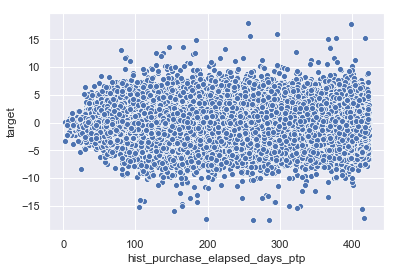

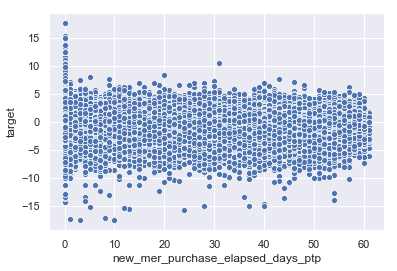

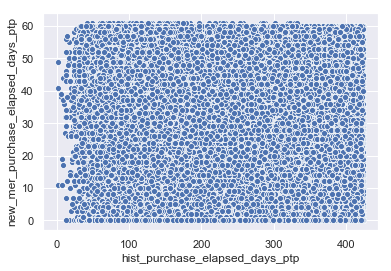

In [64]:
sns.scatterplot(x="hist_purchase_elapsed_days_ptp", y="target", data=train_agg_hist_new_mer_trans)
plt.show()
sns.scatterplot(x="new_mer_purchase_elapsed_days_ptp", y="target", data=train_agg_hist_new_mer_trans)
plt.show()
sns.scatterplot(x="hist_purchase_elapsed_days_ptp", y="new_mer_purchase_elapsed_days_ptp", data=train_agg_hist_new_mer_trans)
plt.show()


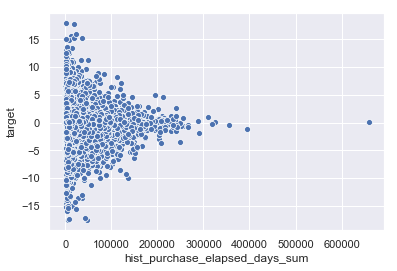

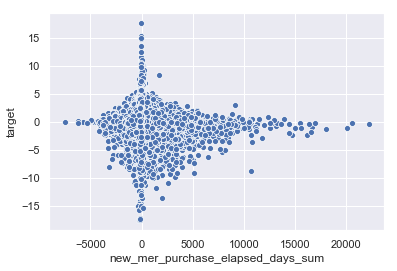

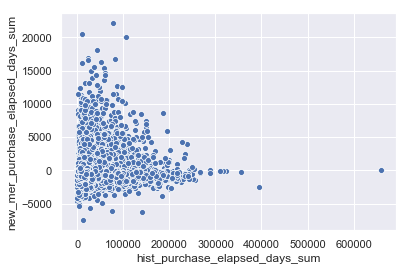

In [65]:
sns.scatterplot(x="hist_purchase_elapsed_days_sum", y="target", data=train_agg_hist_new_mer_trans)
plt.show()
sns.scatterplot(x="new_mer_purchase_elapsed_days_sum", y="target", data=train_agg_hist_new_mer_trans)
plt.show()
sns.scatterplot(x="hist_purchase_elapsed_days_sum", y="new_mer_purchase_elapsed_days_sum", data=train_agg_hist_new_mer_trans)
plt.show()

<b>Observations from the aggregated dataset</b> <br>
<li> The sum of absolute normalized purchase amounts from the new merchant transactions seems to have an inverse relationship 
with the target. The higher the sum of purchase amount from new merchant transactions, the higher is the target. <br>
<li> The count and median of purchases in both historical transactions and new merchant transactions have an influence on 
target variable. <br>
<li> The unique count of cities (e.g. purchase cities) in both historical transactions and the new merchant transactions seem 
to have influence on the target variable. <br>
<li> The range of purchase elapsed days in historical transactions dataset seems to have a relation with target variable. <br>


Finally, lets revisit the questions we were trying to answer <br>

<b> Do the merchants see repeat business ? </b> <br>
<li> Most customers revisit the merchants they already went to. <br>

<b> What are the level of personalization involved ? </b> <br>
There is good amount of personalization involved because of the following: <br>
<li> Feature variables associated with cardholders (feature_1, feature_2 and feature_3 variables in training dataset) <br>
<li> Length of membership <br>
<li> Features associated with cardmembers’ purchase transactions (installments, other features, purchase amount, elapsed days 
    since purchase days <br>
<li> Characteristics of merchants at which the cardmembers shop. <br>
                                                                  
<b>Do the promotions prove beneficial for the consumer and merchants ? </b> <br>
As the features in the historical transactions and new merchant transactions dataset are anonymized, there is no concrete ways
to know whether there is an indicator for promotion. If we could have shown that the (i) total number of sales or (ii) total 
amount of sales with promotion were higher than (i)the total number of sales or (ii)total amount of sales without promotion, 
it would have supported our hypothesis that promotions prove beneficial for the consumer and merchants. <br>

<b>Do the customers enjoy their experience? </b> <br>
<li>This question can’t be fully answered until we figure out (1) a method to separate out the datasets based on whether 
promotion was offered, and (2) identify the variables they denote customer satisfaction associated with these transactions.<br>

In [ ]:
#THE END